Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       1.00      1.00      1.00         2

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



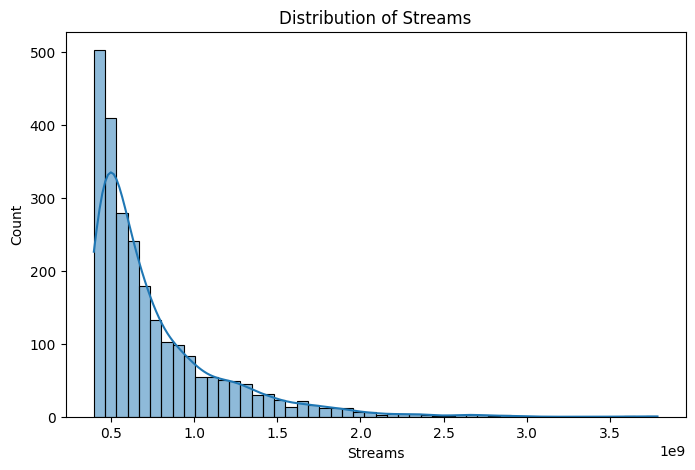

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from flask import Flask, request, jsonify

# Step 1: Load Dataset
df = pd.read_csv("/content/Spotify most streamed.csv")

# Step 2: Data Cleaning & Preprocessing
# Convert 'Streams' and 'Daily' columns to numeric by removing commas
df['Streams'] = df['Streams'].str.replace(',', '').astype(float)
df['Daily'] = df['Daily'].str.replace(',', '').astype(float)

# Split 'Artist and Title' into separate columns
df[['Artist', 'Title']] = df['Artist and Title'].str.split(' - ', n=1, expand=True)
df.drop(columns=['Artist and Title'], inplace=True)

# Drop missing values
df_cleaned = df.dropna()

# Step 3: Define Features and Target
X = df_cleaned[['Streams', 'Daily']]
y = df_cleaned['Streams'].apply(lambda x: 1 if x >= 2000000000 else 0)  # Hit if >=2B streams

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Evaluate Model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model and scaler
joblib.dump(model, "song_popularity_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Step 8: Data Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Streams'], bins=50, kde=True)
plt.title("Distribution of Streams")
plt.xlabel("Streams")
plt.ylabel("Count")
plt.show()


